# Explicacion variables

Date (object)

Representa la fecha en la que se registraron los datos, en formato YYYY-MM-DD (por ejemplo, "2008-12-01"). Es una variable categórica temporal que sirve como identificador o referencia temporal.


Location (object)

Indica la ubicación geográfica donde se tomaron las mediciones, como una ciudad o estación meteorológica (por ejemplo, "Albury"). Es una variable categórica que identifica el lugar.


MinTemp (float64)

Temperatura mínima registrada en el día, en grados Celsius.


MaxTemp (float64)

Temperatura máxima registrada en el día, en grados Celsius.


Rainfall (float64)

Cantidad de precipitación (lluvia) en milímetros registrada en el día.


Evaporation (float64)

Cantidad de evaporación registrada en milímetros, probablemente medida con un evaporímetro.


Sunshine (float64)

Número de horas de sol registradas en el día.


WindGustDir (object)

Dirección del viento más fuerte (ráfaga) del día, en términos de puntos cardinales (por ejemplo, "W" para oeste). 


WindGustSpeed (float64)

Velocidad en kilómetros por hora de la ráfaga de viento más fuerte del día.


WindDir9am (object)

Dirección del viento a las 9 de la mañana, en puntos cardinales (por ejemplo, "WNW" para oeste-noroeste).


WindDir3pm (object)

Dirección del viento a las 3 de la tarde, en puntos cardinales.

WindSpeed9am (float64)

Velocidad del viento en kilómetros por hora a las 9 de la mañana.


WindSpeed3pm (float64)

Velocidad del viento en kilómetros por hora a las 3 de la tarde.


Humidity9am (float64)

Humedad relativa en porcentaje a las 9 de la mañana. 


Humidity3pm (float64)

Humedad relativa en porcentaje a las 3 de la tarde.


Pressure9am (float64)

Presión atmosférica en hectopascales (hPa) a las 9 de la mañana.


Pressure3pm (float64)

Presión atmosférica en hectopascales (hPa) a las 3 de la tarde.


Cloud9am (float64)

Cantidad de nubosidad (en oktas, de 0 a 8) a las 9 de la mañana.


Cloud3pm (float64)

Cantidad de nubosidad a las 3 de la tarde.


Temp9am (float64)

Temperatura en grados Celsius a las 9 de la mañana.


Temp3pm (float64)

Temperatura en grados Celsius a las 3 de la tarde.


RainToday (object)

Indica si llovió o no el día actual, como "Yes" o "No".


RainTomorrow (object)

Predice si lloverá o no al día siguiente, como "Yes" o "No".

In [31]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [32]:
df = pd.read_csv('weatherAUS.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Tratamiento nulos

In [36]:
# nulos por columna
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [37]:
# porcentaje de nulos por columna
porcentajes_nulos = (df.isna().sum() / len(df)) * 100

# Mostrar los resultados
print(porcentajes_nulos)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


Evaporation, Sunshine, Cloud9am, Cloud3pm tienen gran porcentaje de nulos

decidir que hacer   

# Dividir datos de entrenamiento y testeo

In [38]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116368, 22), (29092, 22), (116368,), (29092,))

In [40]:
df.shape

(145460, 23)

# Graficos

<Axes: xlabel='count', ylabel='Location'>

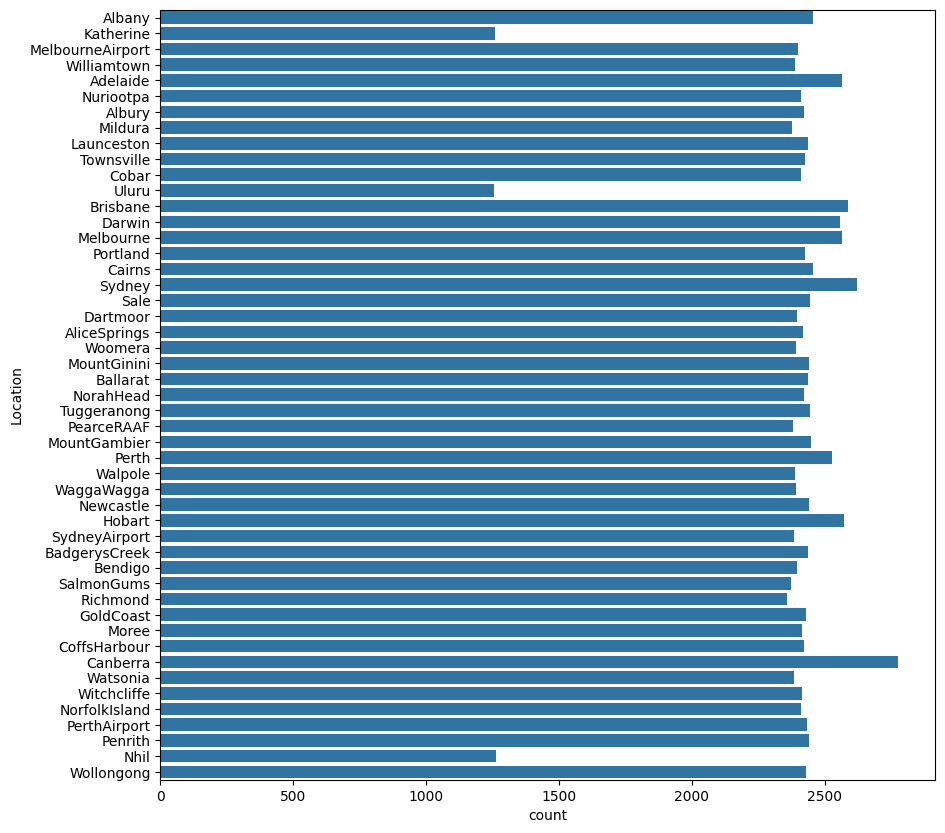

In [41]:
# Gráfico de barras de la columna 'Location'
plt.figure(figsize=(10, 10))
sns.countplot(X_train['Location'])

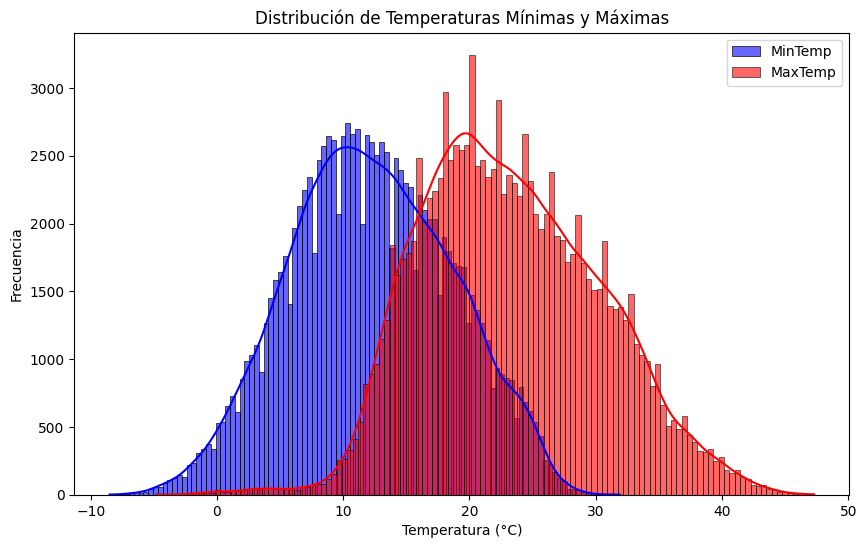

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x="MinTemp", color="blue", label="MinTemp", kde=True, alpha=0.6)
sns.histplot(data=X_train, x="MaxTemp", color="red", label="MaxTemp", kde=True, alpha=0.6)
plt.legend()
plt.title("Distribución de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

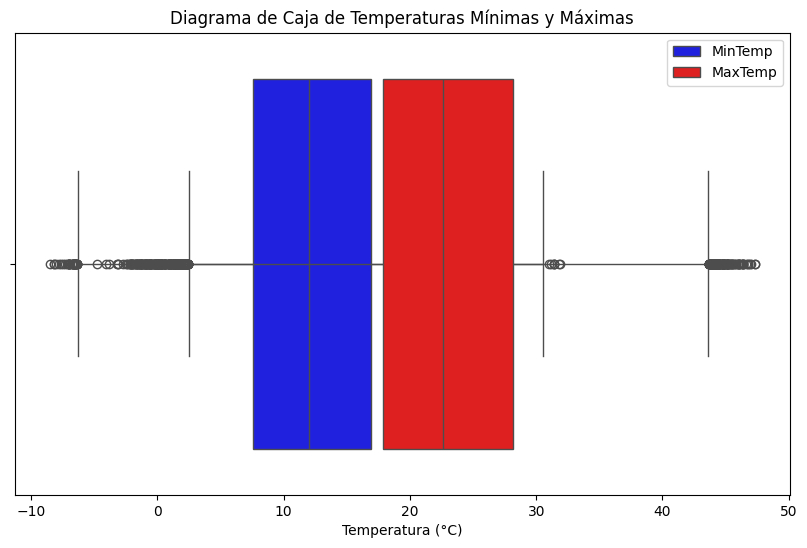

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x="MinTemp", color="blue", label="MinTemp")
sns.boxplot(data=X_train, x="MaxTemp", color="red", label="MaxTemp")
plt.title("Diagrama de Caja de Temperaturas Mínimas y Máximas")
plt.xlabel("Temperatura (°C)")
plt.show()

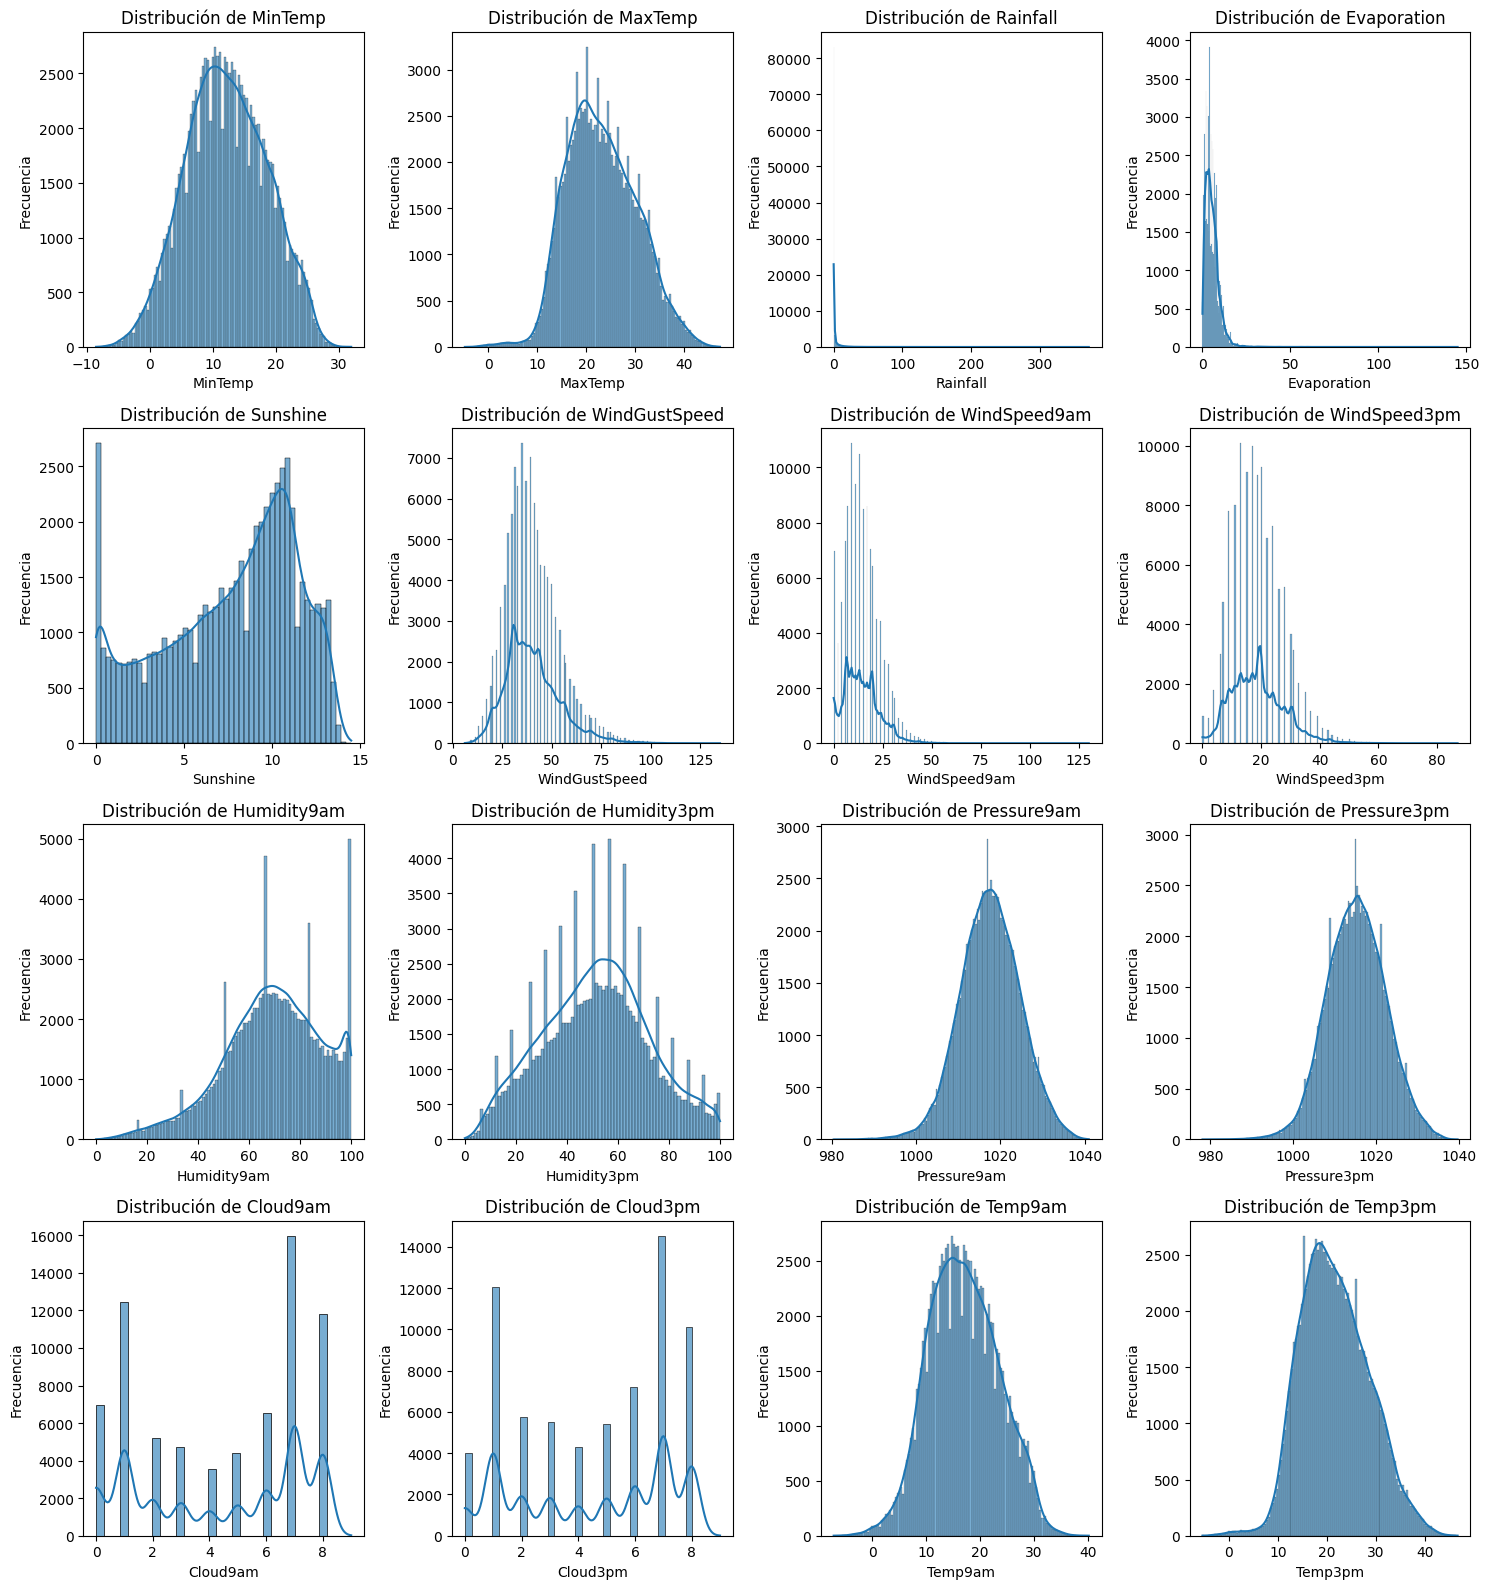

In [44]:
# Gráficos de distribución para todas las columnas numéricas

numeric_cols = X_train.select_dtypes(include=['float64']).columns

n_cols = 4 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 
plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X_train, x=column, kde=True, alpha=0.6)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

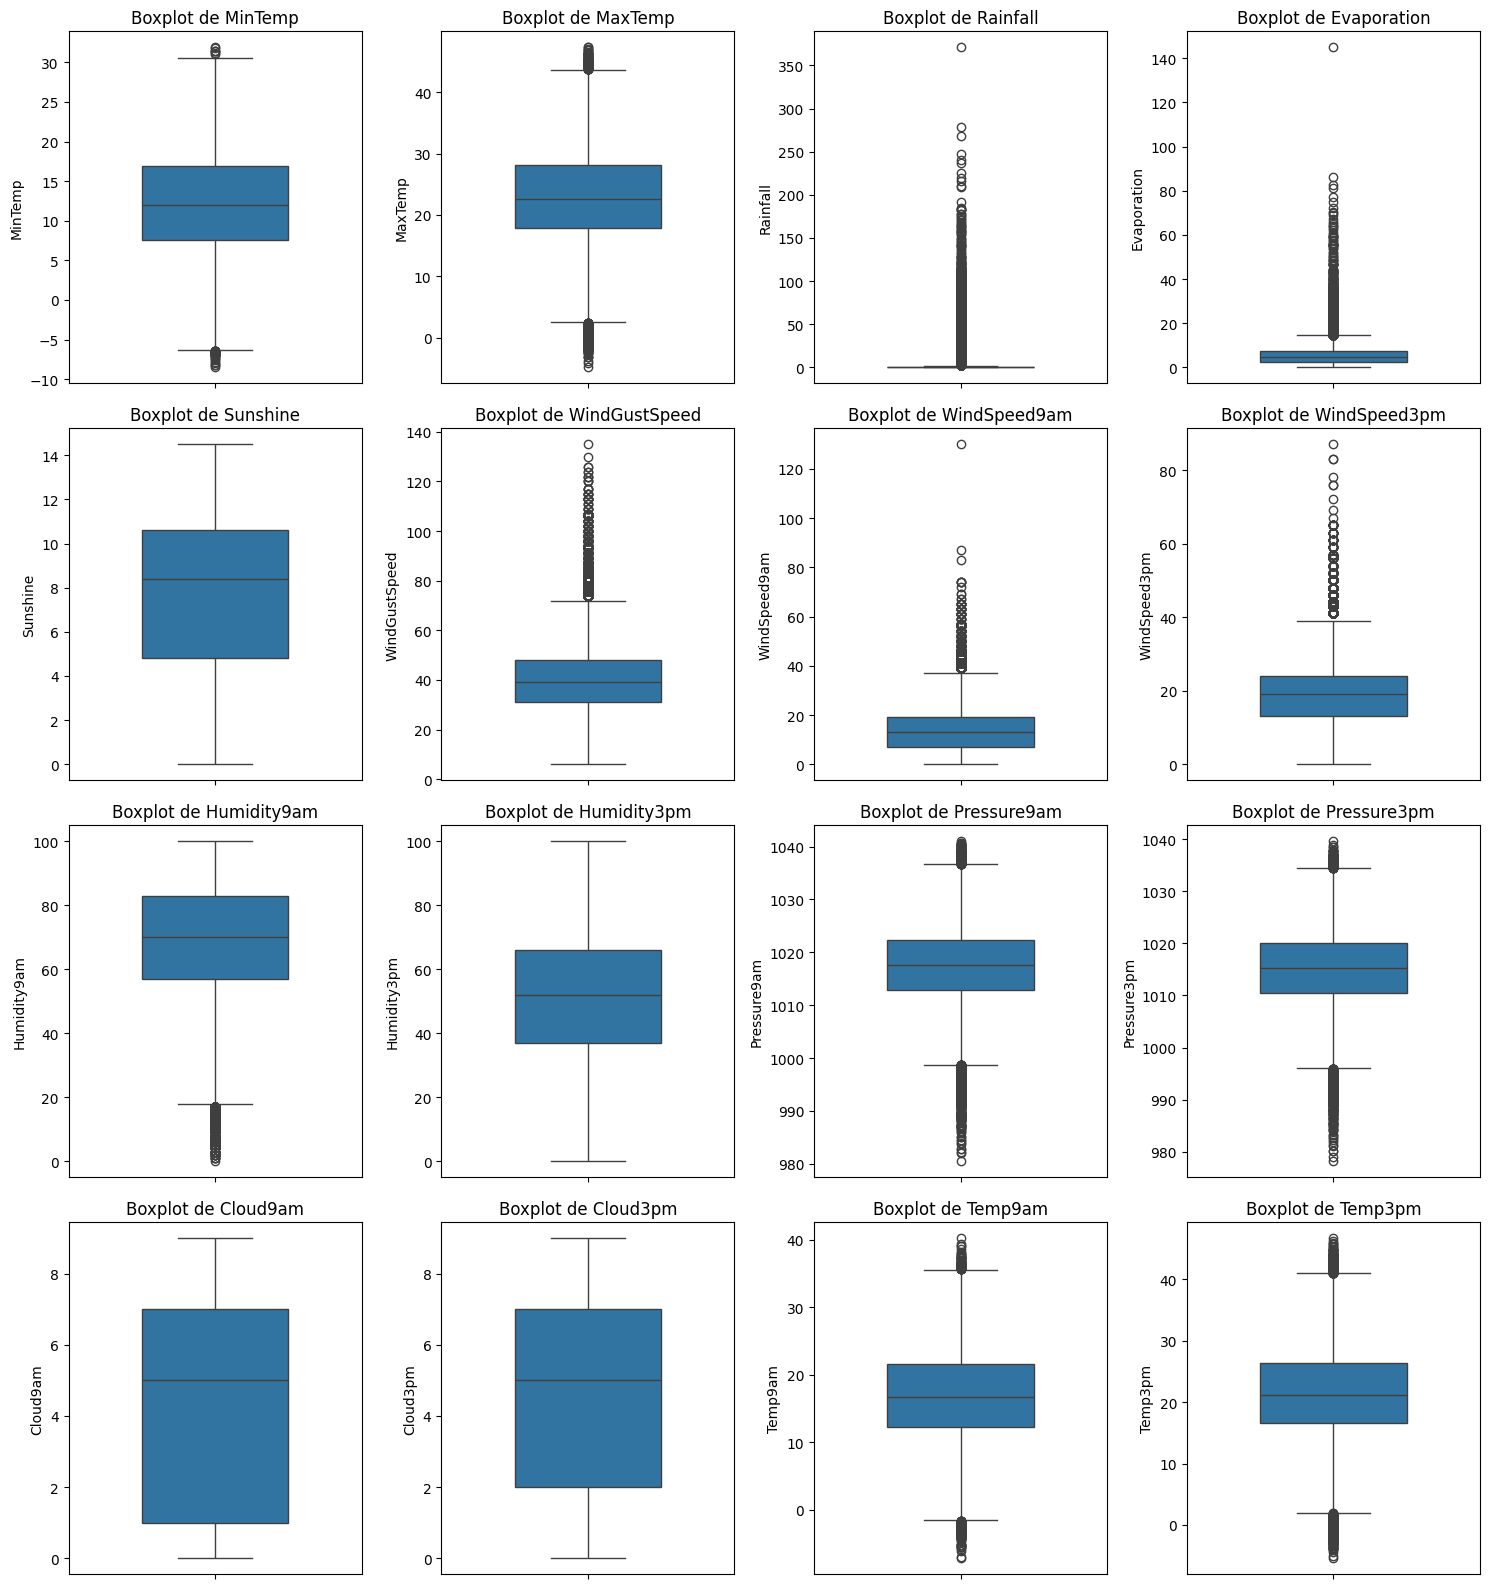

In [45]:
# Gráficos de boxplot para las columnas numéricas

numeric_cols = X_train.select_dtypes(include=['float64']).columns

n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, n_rows * 4)) 

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=X_train, y=column, width=0.5)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='RainTomorrow'>

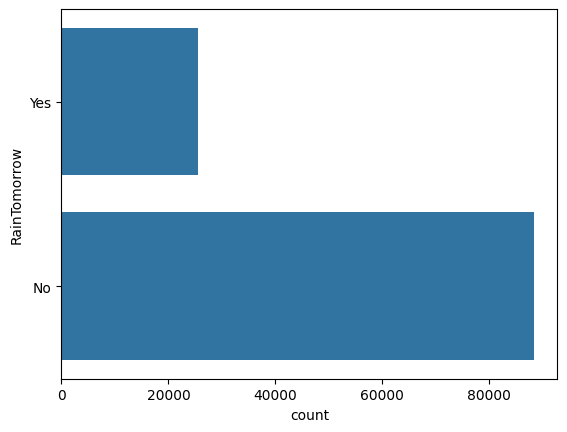

In [46]:
# variable objetivo
sns.countplot(y_train)

La variable objetivo esta bastante desbalanceada